# <u>Partie 1.1:</u> Pré-Processing des données

<b><u>Auteurs</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> Mars 2023

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définit le chemin du répertoire parent
import sys
sys.path.append("../")

# Custom packages
from py_scripts import pre_processing as pp
from py_scripts.utils import *


In [2]:
# Pour afficher toutes les collones et lignes de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# Chargement de la base de données original.
DATASET_ORI = pp.load_dataset()
DATASET_ORI.describe()


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,number_speed_dating,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,

In [23]:
# Calcul de la proportions des valeurs manquantes par colonnes.
greater_than = 30
DATASET, DF_NULL = pp.remove_cols_with_null_data(DATASET_ORI, greater_than)


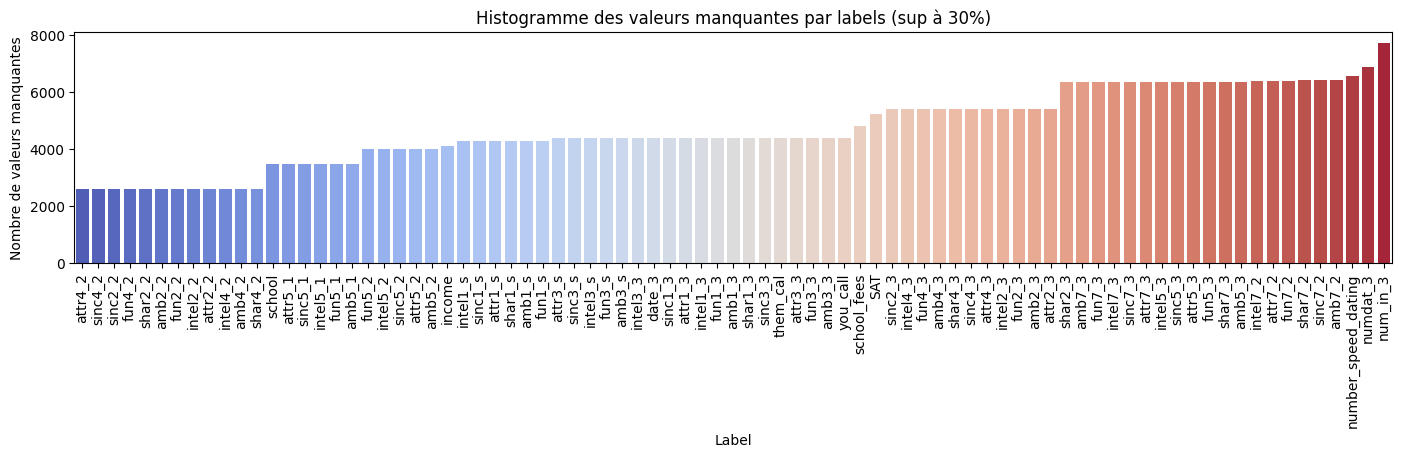

In [24]:
data = DF_NULL[DF_NULL["ratio"] >= greater_than]

# Visualisation des valeurs manquantes.
plt.figure(figsize=(17, 3))
sns.barplot(data=data, x="label", y="count", palette="coolwarm")
plt.title(f"Histogramme des valeurs manquantes par labels (sup à {greater_than}%)")
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Nombre de valeurs manquantes")
plt.show()


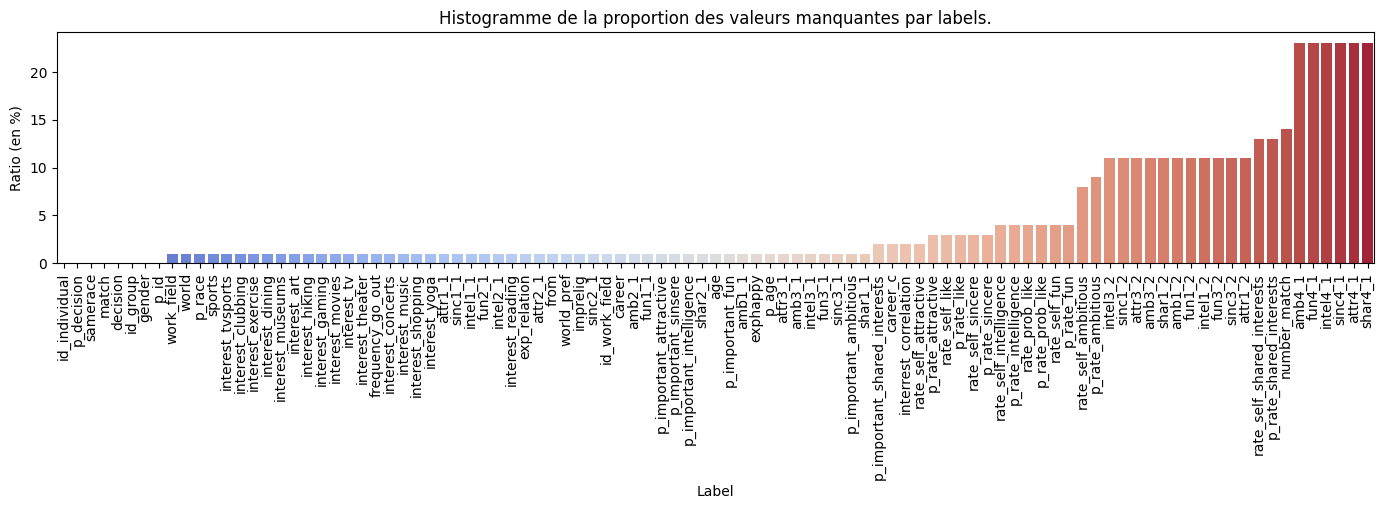

In [25]:
data = DF_NULL[DF_NULL["ratio"] < greater_than]

# Visualisation des colonnes restantes.
plt.figure(figsize=(17, 3))
sns.barplot(data=data, x="label", y="ratio", palette="coolwarm")
plt.title(f"Histogramme de la proportion des valeurs manquantes par labels.")
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Ratio (en %)")
plt.show()


In [26]:
# Normalize les données de type 'range'.
DATASET = pp.normalize_range_columns(DATASET)
DATASET.describe()


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
count,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,7205.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,2.288817,1.774279,2.036796,1.800604,1.078588,1.195903,0.419551,6.190301,7.175133,7.369301,6.400599,6.778605,5.474938,6.133243,5.207940,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.843596,5.745993,7.660080,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,2.290517,1.774310,2.036269,1.800338,1.078029,1.195713,2.662198,1.127138,1.336724,1.611650,0.975343,1.134375,3.026509,1.328714,1.485601,1.876130,1.138738,1.176258,7.084733,8.294935,7.704460,8.403965,7.578388,0.419909,6.189946,7.175040,7.368597,6.400722,6.777720,5.474627,6.132834,5.207213,3.207814,2.648220,1.629104,1.837465,1.826075,0.978695,1.279512,7.125285,7.931529,8.238912,7.602171,7.486802
std,158.583367,0.500029,10.940735,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,1.272698,0.738871,0.663603,0.635523,0.801368,0.788298,0.493515,1.950529,1.740623,1.550860,1.953918,1.794168,2.156235,1.841468,2.129144,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.105246,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.501024,2.502218,1.971051,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,1.274392,0.739047,0.663594,0.635630,0.801333,0.788401,1.616115,0.792236,0.745647,0.718927,0.834858,0.735540,1.656082,0.832376,0.713387,0.648028,0.832674,0.765090,1.395783,1.407460,1.564321,1.076608,1.778315,0.493573,1.950520,1.740363,1.550812,1.953804,1.794143,2.156435,1.841495,2.129355,2.444813,1.460095,0.746596,0.667008,0.639771,0.753408,0.791856,1.371390,1.503236,1.180280,1.5482

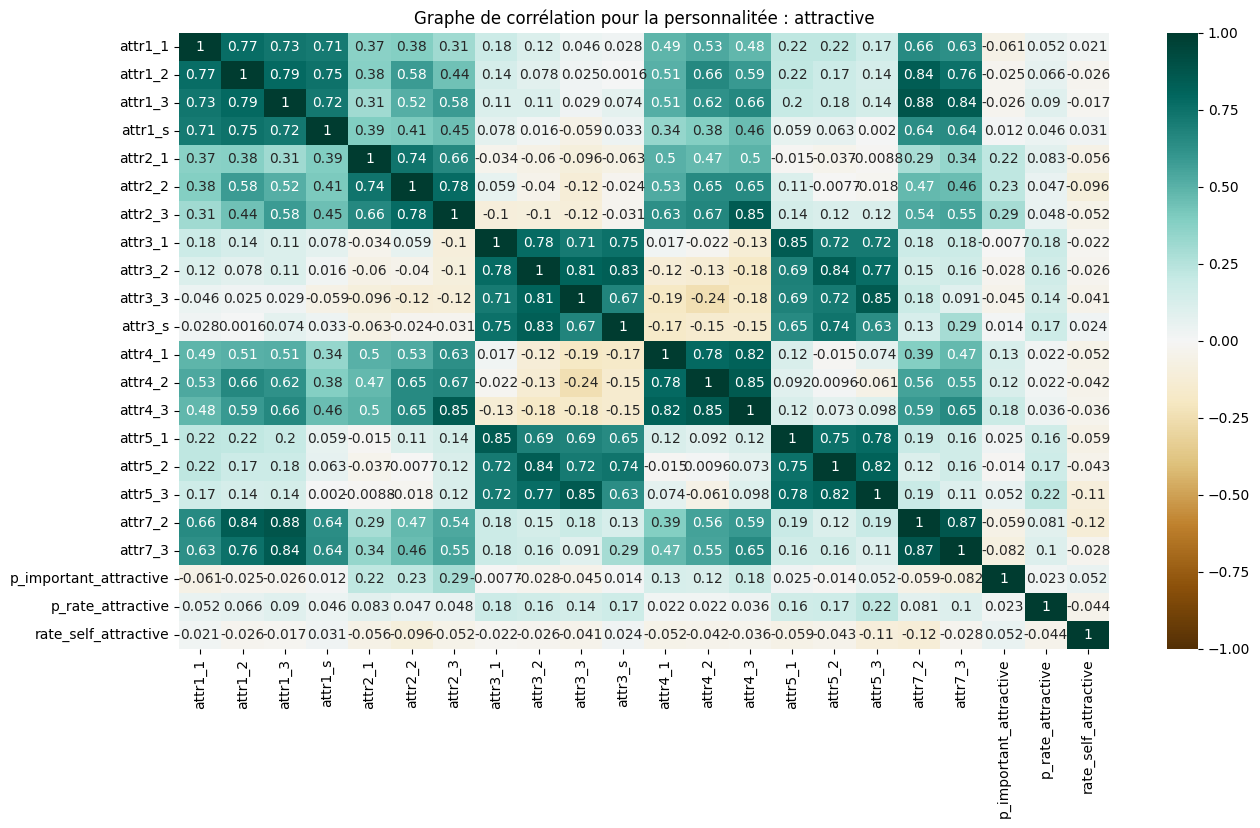

In [27]:
# Dictionnaire qui associe les personnalitées et leurs abbréviations
PERSONALITIES = {"attractive": "attr", "sincerite": "sinc",  "intelligence": "intel",
                 "generosite": "shar", "ambition": "amb",  "humour": "fun"}

# La personnalitée à analyser.
perso = "attractive"
data = filter_dataframe_by_substr(DATASET_ORI, PERSONALITIES[perso]).corr()

# Affiche les corrélations entre les clefs ayant un lien avec cette personnalitée.
# Permets d'étudier si l'on peut compléter les valeurs manquantes des clefs importantes.
plt.figure(figsize=(15, 8))
sns.heatmap(data, annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.title(f"Graphe de corrélation pour la personnalitée : {perso}")
plt.show()


In [28]:
# On peut supprimer les colonnes de personnalité secondaire, celle qui se termine par 'n_n' avec n un nombre.
DATASET = pp.remove_cols_personnality_snd(DATASET)

stat = DATASET.describe()
stat.loc["null"] = DATASET.isna().sum()
stat

,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match
count,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,7205.000000
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,2.288817,1.774279,2.036796,1.800604,1.078588,1.195903,0.419551,6.190301,7.175133,7.369301,6.400599,6.778605,5.474938,6.133243,5.207940,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.843596,5.745993,7.660080,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,0.419909,6.189946,7.175040,7.368597,6.400722,6.777720,5.474627,6.132834,5.207213,3.207814
std,158.583367,0.500029,10.940735,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,1.272698,0.738871,0.663603,0.635523,0.801368,0.788298,0.493515,1.950529,1.740623,1.550860,1.953918,1.794168,2.156235,1.841468,2.129144,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.105246,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.501024,2.502218,1.971051,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,0.493573,1.950520,1.740363,1.550812,1.953804,1.794143,2.156435,1.841495,2.129355,2.444813
min,1.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.000000,8.000000,154.000000,0.000000,-0.020000,0.000000,24.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,2.000000
50%,281.000000,1.000000,16.000000,281.000000,0.000000,0.210000,0.000000,26.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,6.000000,7.000000,7.00

In [29]:
# Normalise et encode les valeurs de la colonnes work_fields, career et from.
to_multhot_encode =  ["work_field", "career", "from"]
DATASET = pp.enc_multhot_dataframe(DATASET, to_multhot_encode)

DATASET.head()


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
0,1,0,1,11.0,0,0.14,0,27.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,4.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,1,0,1,12.0,0,0.54,0,22.0,2.0,6.0,0.0,0.0,4.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,13.0,1,0.16,1,22.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,14.0,1,0.61,0,23.0,2.0,3.0,0.0,2.0,4.0,0.0,0.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,15.0,1,0.21,0,24.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,21.0,1.0,4.0,2.0,4.0,2.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
a = DATASET.groupby(["id_individual", "p_id"])

In [31]:
# Remplies les valeurs NaN
DATASET = pp.fill_nan_dataframe(DATASET)

stat = DATASET.describe()
stat.loc["null"] = DATASET.isna().sum()
stat


,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.0
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,2.288817,1.774279,2.036796,1.800604,1.078588,1.195903,0.419551,6.190301,7.175133,7.369301,6.400599,6.778605,5.474938,6.133243,5.207940,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.843596,5.745993,7.660080,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,0.419909,6.189946,7.175040,7.368597,6.400722,6.777720,5.474627,6.132834,5.207213,3.207814,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.0
std,158.583367,0.500029,10.940735,158.490216,0.370947,0.300663,0.489051,3.541458,1.225315,1.265919,0.734936,0.660068,0.631794,0.796234,0.782205,0.493515,1.925690,1.710546,1.522272,1.911473,1.715108,2.012997,1.813782,2.088341,3.546480,3.740492,1.226267,2.832258,2.791978,1.400530,1.100022,3.282147,2.606645,2.788632,2.407425,1.746573,2.042532,2.252709,2.558059,2.489203,2.490391,1.961735,2.517181,2.224588,1.692888,2.146091,1.783358,2.596582,2.704767,1.723574,0.493573,1.926859,1.711347,1.523167,1.912553,1.716204,2.014423,1.814924,2.089713,2.267192,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.0

## Etude de la distrubution des données.

In [32]:
norm_columns = ["world_pref", "imprelig", "sports", "rate_prob_like"]
norm_substr = ["p_important_", "p_rate_", "interest_", "rate_self_"]
norm_substr = get_matching_keys(DATASET.columns, norm_substr)
norm_columns = norm_columns + norm_substr

stand_columns = ["p_age", "p_race", "age", "exp_relation", "frequency_go_out",
                 "number_match"]

DATASET_DIST = DATASET[stand_columns + norm_columns]

pp.normalize_dataframe(DATASET, norm_columns)
pp.standardize_dataframe(DATASET, stand_columns)

In [33]:
DATASET.describe()

,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_decision,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,id_work_field,world,world_pref,imprelig,exp_relation,frequency_go_out,career_c,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,decision,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.00000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8.378000e+03,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.0
mean,283.675937,0.500597,17.327166,283.863767,0.164717,0.196010,0.395799,-6.377753e-16,-2.340771e-16,0.228882,0.295713,0.407359,0.360121,0.215718,0.398634,0.419551,0.619030,0.717513,0.736930,0.640060,0.677861,0.547494,0.613324,0.520794,-6.750919e-16,7.662488,2.757186,0.378479,0.294627,-1.645325e-16,-7.463328e-17,5.277791,0.602804,0.397277,0.582868,0.753759,0.698578,0.671454,0.573708,0.38436,0.574599,0.740009,0.478237,0.677612,0.791963,0.682540,0.761230,0.514587,0.433920,5.534131,0.419909,0.618995,0.717504,0.736860,0.640072,0.677772,0.547463,0.613283,0.520721,1.696211e-18,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.0
std,158.583367,0.500029,10.940735,158.490216,0.370947,0.300663,0.489051,1.000000e+00,1.000000e+00,0.126592,0.122489,0.132014,0.126359,0.159247,0.260735,0.493515,0.192569,0.171055,0.152227,0.191147,0.171511,0.201300,0.181378,0.208834,1.000000e+00,3.740492,1.226267,0.283226,0.310220,1.000000e+00,1.000000e+00,3.282147,0.289627,0.309848,0.267492,0.194064,0.204253,0.225271,0.255806,0.24892,0.249039,0.217971,0.279687,0.222459,0.169289,0.214609,0.198151,0.288509,0.270477,1.723574,0.493573,0.192686,0.171135,0.152317,0.191255,0.171620,0.201442,0.181492,0.208971,1.000000e+00,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.010925,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,-2.362021e+00,-1.433634e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

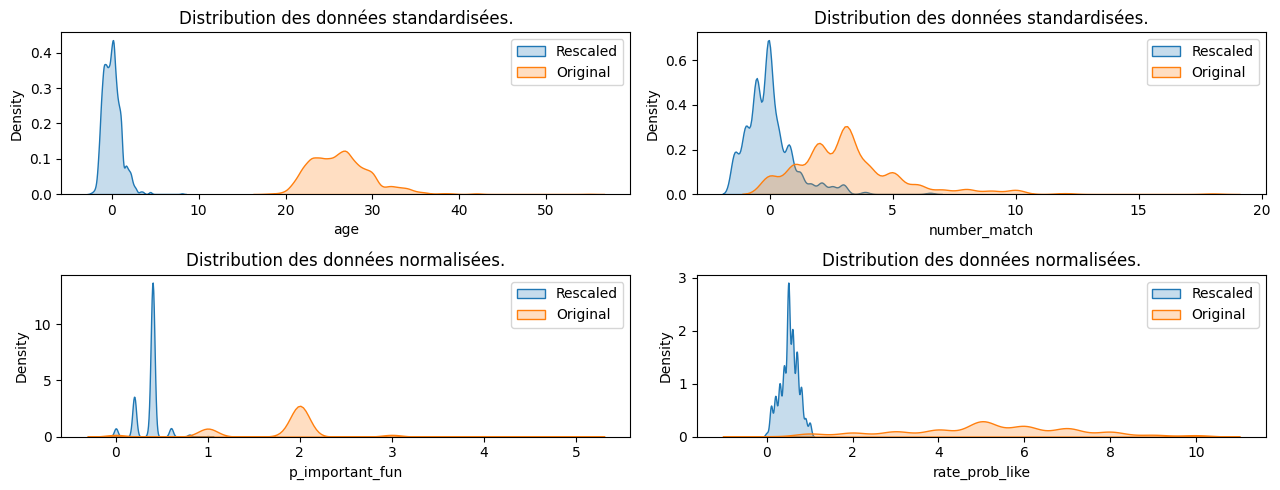

In [34]:
cols = ["age", "number_match", "p_important_fun", "rate_prob_like"]
titles = ["standardisées", "standardisées", "normalisées", "normalisées"]
i = 0

fig, axes = plt.subplots(2, 2,  figsize=(13, 5))
axes = axes.ravel()  # type:ignore


for col, ax in zip(cols, axes):
    ax.set_title(f"Distribution des données {titles[i]}.")
    sns.kdeplot(data=DATASET[col], ax=ax, fill=True, label="Rescaled")
    sns.kdeplot(data=DATASET_DIST[col], ax=ax, fill=True, label="Original")
    ax.legend()
    i += 1


fig.tight_layout()
plt.show()
